# Answer to the question no. 01

In [7]:
import pandas as pd

# a) Load the dataset
file_path = 'Medicaldataset.csv'
df = pd.read_csv(file_path)

In [4]:
# b) Print the first and last 10 rows of the dataset
print("First 10 rows of the dataset:")
print(df.head(10))

print("\nLast 10 rows of the dataset:")
print(df.tail(10))

First 10 rows of the dataset:
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   
5   58       0          61                      112                        58   
6   32       0          40                      179                        68   
7   63       1          60                      214                        82   
8   44       0          60                      154                        81   
9   67       1          61                      160                        95   

   Blood sugar   CK-MB  Troponin    Result  
0        160.0    1.80     0.012 

In [5]:
# c) Show information about the dataset (data types, non-null counts, etc.)
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
# d) Show the data quality report
# Data Quality Report includes the count of missing values, unique values, mean, standard deviation, min, and max for each column
print("\nData Quality Report:")
data_quality_report = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.notnull().sum(),
    'Missing Count': df.isnull().sum(),
    'Unique Values': df.nunique(),
    'Mean': df.mean(numeric_only=True),
    'Std Dev': df.std(numeric_only=True),
    'Min': df.min(numeric_only=True),
    'Max': df.max(numeric_only=True)
})
print(data_quality_report)


Data Quality Report:
                         Data Type  Non-Null Count  Missing Count  \
Age                          int64            1319              0   
Blood sugar                float64            1319              0   
CK-MB                      float64            1319              0   
Diastolic blood pressure     int64            1319              0   
Gender                       int64            1319              0   
Heart rate                   int64            1319              0   
Result                      object            1319              0   
Systolic blood pressure      int64            1319              0   
Troponin                   float64            1319              0   

                          Unique Values        Mean    Std Dev     Min     Max  
Age                                  75   56.191812  13.647315  14.000   103.0  
Blood sugar                         244  146.634344  74.923045  35.000   541.0  
CK-MB                               700   15

# Answer(scripts) to the question no. 02

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Crop_recommendation.csv'
df = pd.read_csv(file_path)

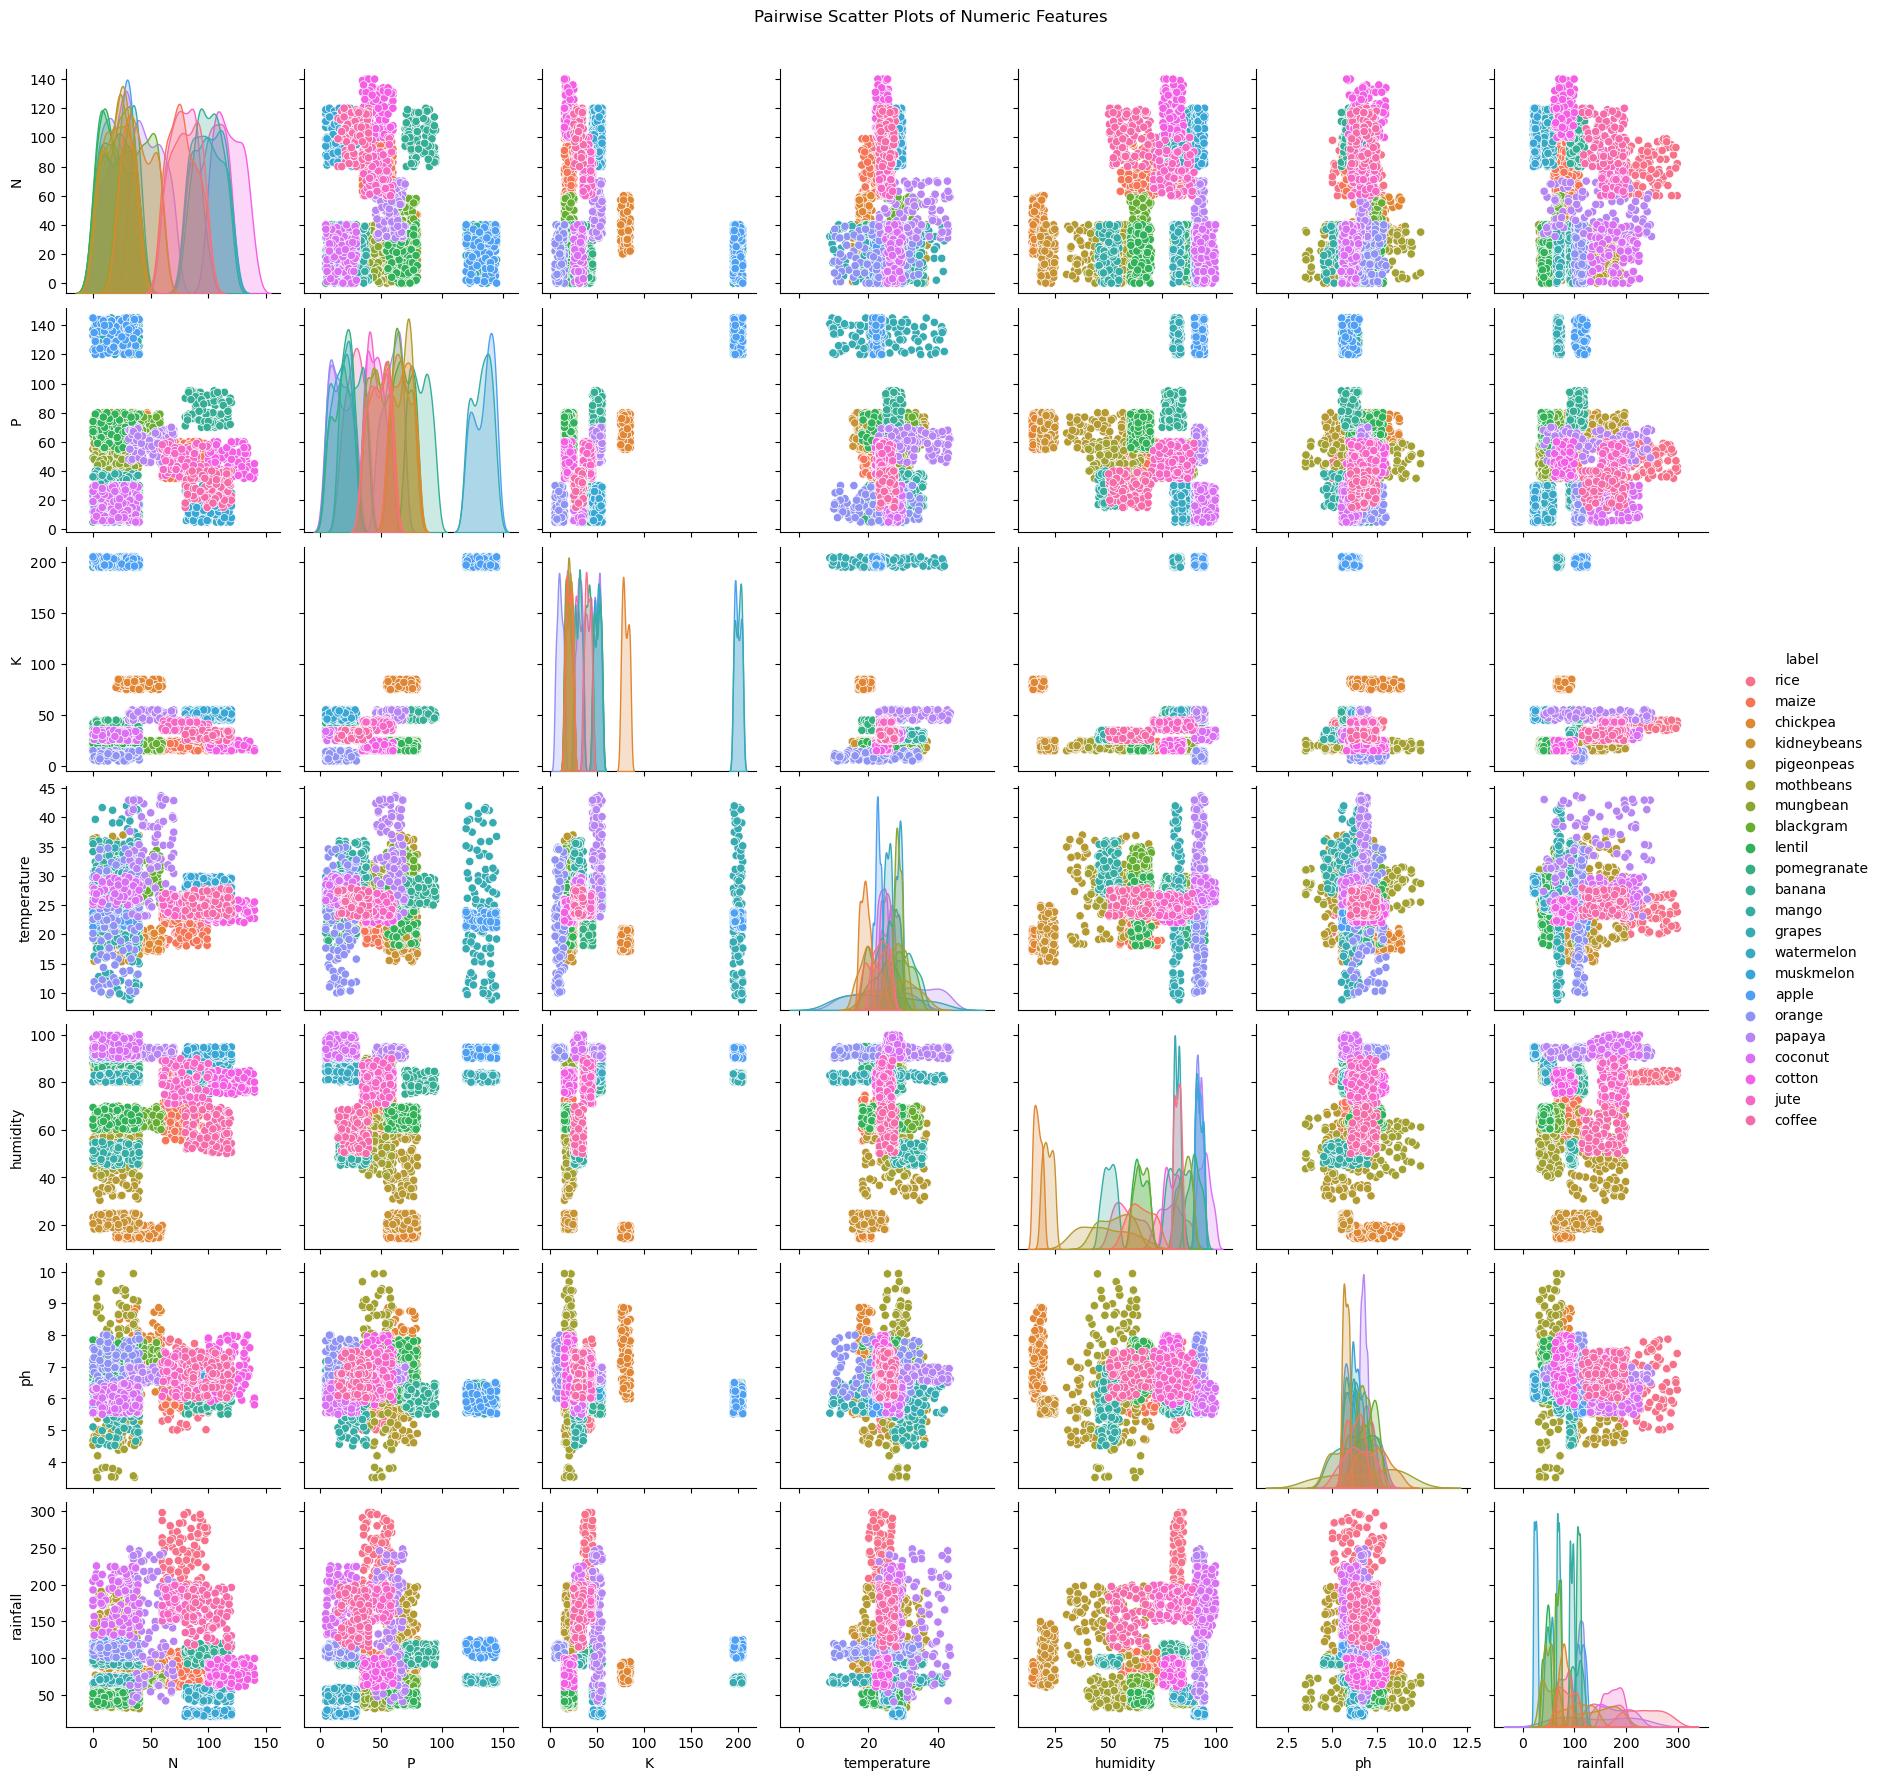

In [9]:
# Separate the numeric columns (exclude the categorical target 'label')
numeric_columns = df.drop(columns=['label']).columns

# Generate pairwise scatter plots among all numeric features
sns.pairplot(df, hue='label', vars=numeric_columns, diag_kind='kde', height=2.5)
plt.suptitle("Pairwise Scatter Plots of Numeric Features", y=1.02)
plt.show()

# Findings

In the scatterplots we can show if there is any linerar relationship between thow feature. But unfortunately there is no such pattern of explecit linear relationship. However we can see there may other relationship such as:-

* Clusters: Clustering of points in scatter plots indicates groups where feature values are similar within a crop type.

* Nonlinear Patterns: If the data points show curves or other shapes rather than a line, there may be a nonlinear relationship. These are worth investigating as they may imply complex interactions.

* Distribution of Each Feature: The diagonal elements (density plots) show the distribution of each feature. This helps identify if any features have a normal distribution or if they are skewed. For example, the distribution of temperature and PH is showing normal distribution for almost all calass or crops. Where the distribution for K(ratio of Potassium content in soil) has skeweed distributin. Further more the distribution for N(ratio of Nitrogen content in soil) shows uniform distribution.



Given are some classwise relations to different features that I discovered, or higher-level information that can be interpretable for farmers.

* From the matrix the scatter plot for N(Nitrogen) and P(ratio of Phosphorous content in soil) which is at position 1,2 (row=1, col=2) The crop Jute and coffee is good or sutable for higher of 'N' and lower to mid value of 'P'.

* Aditionally, in the matrix position[1,2] shows that the apple is sutable where the Nitrogen value his lower to lower mid and the Phorphorous value is higher

* Furthermore, in the same plot which is postion[1,2] the crop Coconut does not require much more Nitrogen and Phosphorus, so in such soil where Nitrogen and Phosphorus is low, Coconut is also sutable in that soil.

Similarly we can get such more information from all the scatter plots. If we want to quantify these patterns further, calculating the correlation coefficients between features or performing cluster analysis (like K-means or hierarchical clustering) could be helpful to identify and confirm these patterns in more detail.